<a href="https://colab.research.google.com/github/AnanyaBansal4/Calories-Burnt-Prediction/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from google.colab import files
import io
uploaded = files.upload()

Saving calories.csv to calories (1).csv
Saving exercise.csv to exercise (1).csv


In [10]:
calories = pd.read_csv('/content/calories.csv')

In [11]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [12]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [13]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Merging the two

In [17]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [18]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
calories_data.shape

(15000, 9)

In [20]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [21]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [22]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: xlabel='count', ylabel='Gender'>

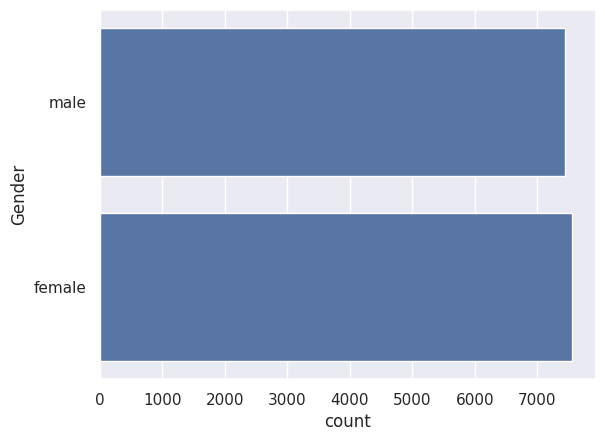

In [23]:
sns.set()
sns.countplot(calories_data['Gender']) # plotting the gender column in count plot

<Axes: xlabel='Age', ylabel='Count'>

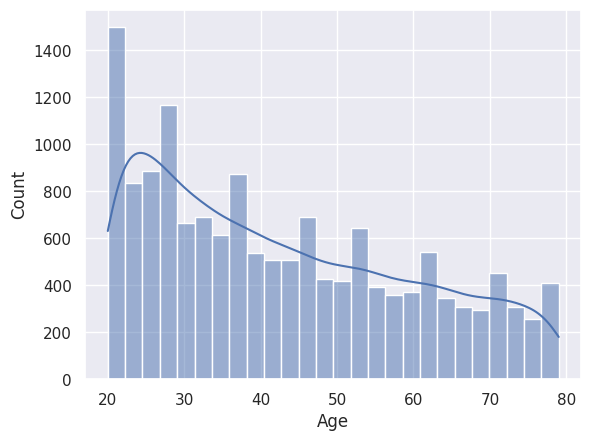

In [29]:
#sns.distplot(calories_data['Age'])
sns.histplot(calories_data['Age'], kde=True) # finding the distribution of "Age" column

<Axes: xlabel='Height', ylabel='Count'>

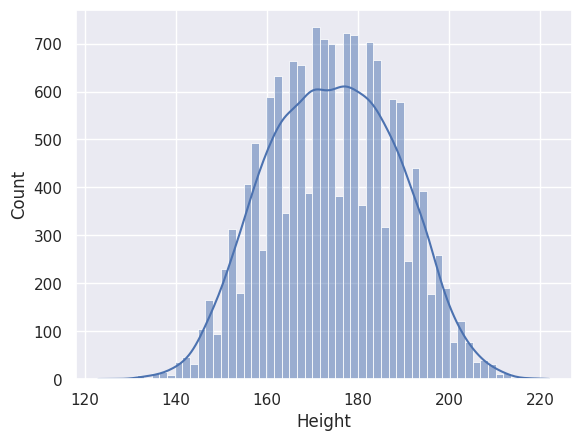

In [30]:
#sns.distplot(calories_data['Height']) do not use this as this will be removed in future versions of sns
sns.histplot(calories_data['Height'], kde=True) # finding the distribution of "Height" column

<Axes: xlabel='Weight', ylabel='Count'>

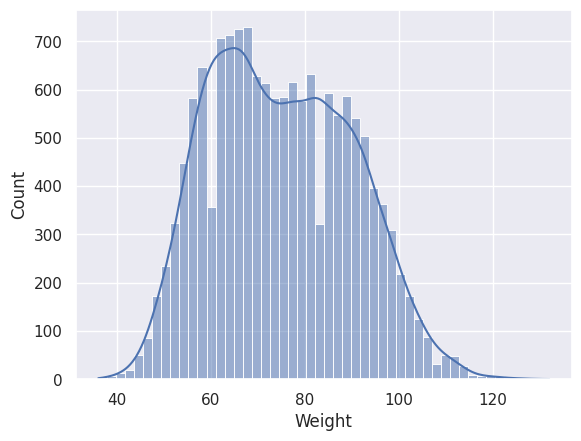

In [31]:
sns.histplot(calories_data['Weight'], kde=True) # finding the distribution of "Weight" column

Finding the Correlation

In [36]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [37]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [38]:
correlation = calories_data.corr()

<Axes: >

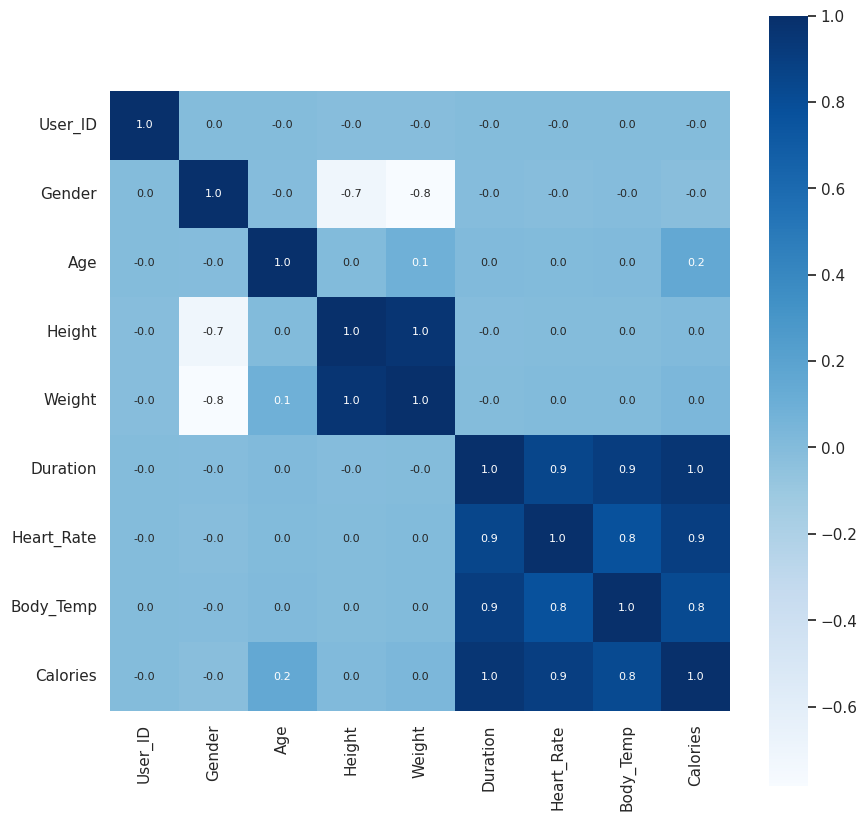

In [39]:

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [40]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [41]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [42]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [43]:
X.corr()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
Gender,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264
Age,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


# Linear Regression Model

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [49]:
 model = LinearRegression()


In [50]:
 model.fit(X_train, Y_train)

LinearRegression()

In [51]:
test_data_prediction = model.predict(X_test)

In [52]:
print(test_data_prediction)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


In [87]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
r2 = r2_score(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)
n_obs = len(Y_test)
n_features = len(model.coef_) + 1
aic = math.log(mse) * n_obs + 2 * n_features
bic = n_obs * math.log(mse) + n_features * math.log(n_obs)

In [88]:
print("R2 score = ", r2 )
print("Mean Squared Error = ", mse)
print("Akaike Information Criterion = ", aic)
print("Bayesian Information Criterion = ", bic)

R2 score =  0.9668790377181355
Mean Squared Error =  130.08707386188374
Akaike Information Criterion =  14620.612075533865
Bayesian Information Criterion =  14668.663016075066


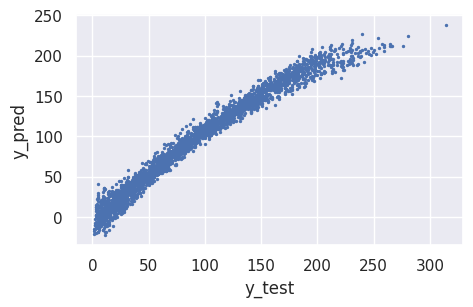

In [62]:
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(Y_test, test_data_prediction,s=2)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Lasso Regression Model

In [83]:
model = Lasso(alpha=0.00001)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [84]:
 model.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [81]:
  predictions_val = model.predict(X_test)
  r2 = r2_score(y_test, predictions_val)
  print("R2 score:", r2)

R2 score: 0.9668790377891643


In [82]:
mae = mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  8.385188053147187


In [89]:
n_obs = len(Y_test)
n_features = len(model.coef_) + 1
aic = math.log(mse) * n_obs + 2 * n_features
bic = n_obs * math.log(mse) + n_features * math.log(n_obs)

In [90]:
print("Akaike Information Criterion = ", aic)
print("Bayesian Information Criterion = ", bic)

Akaike Information Criterion =  14620.612075533865
Bayesian Information Criterion =  14668.663016075066


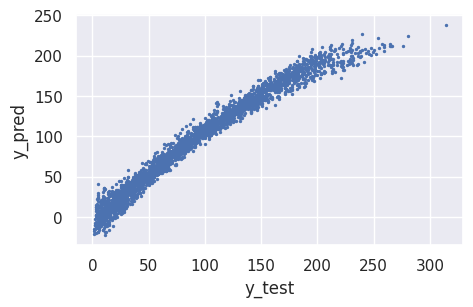

In [91]:
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(y_test, predictions_val,s=2)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# PCA

Explained Variance Ratio: [4.81022858e-01 3.25827671e-01 1.70370190e-01 1.32354702e-02
 9.31694918e-03 1.26289760e-04 1.00571533e-04]


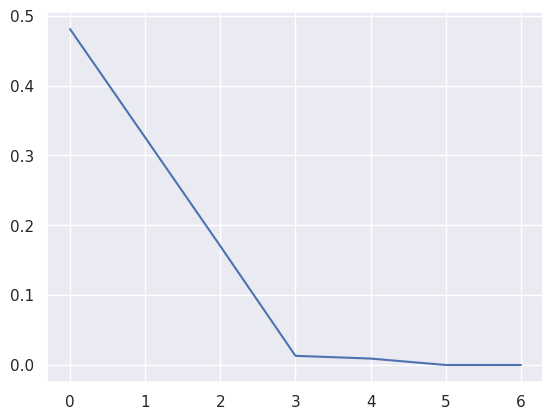

In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=7)
pca.fit(X)
principal_components = pca.transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)

In [105]:
eigenvectors = pca.components_

print("Eigenvectors (Principal Components):")
print(eigenvectors)

Eigenvectors (Principal Components):
[[-1.81891267e-02  1.35009080e-01  6.77488100e-01  7.22804871e-01
  -4.06560608e-04  2.12092977e-03  1.82580185e-04]
 [ 3.49623099e-03  9.89383765e-01 -1.29380689e-01 -6.34760268e-02
   1.30034763e-02  1.29862229e-02  1.11417369e-03]
 [-4.02725453e-04 -1.84510913e-02 -1.46973454e-04  1.68881163e-03
   6.45574858e-01  7.61510024e-01  5.47001616e-02]
 [ 1.67466127e-03 -1.13226891e-04  1.81493267e-02 -1.46367728e-02
   7.58730344e-01 -6.47802549e-01  6.42936362e-02]
 [-4.71571122e-02 -5.04019198e-02 -7.23521281e-01  6.86445076e-01
   1.61936570e-02 -1.67584580e-02  1.69906854e-03]
 [-7.25385250e-03  4.95460763e-05  6.43313418e-05  4.71297107e-05
   8.44380227e-02 -1.28344191e-05 -9.96402325e-01]
 [ 9.98687916e-01 -3.39155761e-03 -2.14019802e-02  4.58255443e-02
   3.13072806e-04  5.95111586e-04 -7.24335157e-03]]


In [107]:
def project_df(df_A, df_B, n):
    array_A = df_A
    # print(df_A.shape)
    array_B = df_B[:n,:].T
    # print(array_B.shape)

    # Perform matrix multiplication using NumPy
    result = np.matmul(array_A, array_B)

    # Convert the result back to a DataFrame (optional)
    df_result = pd.DataFrame(result)
    return df_result

In [113]:
    model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    X_test=project_df(X_test, eigenvectors, number_of_components)
    X_train=project_df(X_train, eigenvectors, number_of_components)

    model.fit(X_train, y_train)

    predictions_val = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions_val)
    r2 = r2_score(y_test, predictions_val)

    #print('\n\n\033[1mNumber_of_components',number_of_components,'\033[0m')
    print("Validation r2 score:", r2)


Validation r2 score: 0.966327512761902


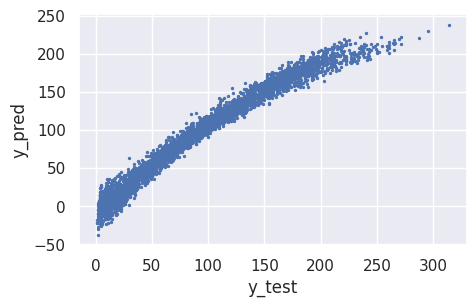

In [114]:
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(y_test, predictions_val,s=2)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# XGBoost Regressor (Extreme Gradient Boosting)

In [94]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [95]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [100]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
r2 = r2_score(Y_test, test_data_prediction)
mse = mean_squared_error(Y_test, test_data_prediction)

print("Mean Absolute Error = ", mae)
print("R2 score = ", r2 )
#print("Mean Squared Error = ", mse)


Mean Absolute Error =  1.4833678883314132
R2 score =  0.998800624504713


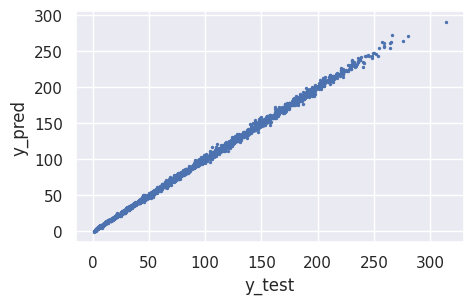

In [101]:
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)
plt.scatter(Y_test, test_data_prediction,s=2)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()